In [1]:
import numpy as np
import random
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
directory = "/home/julian/Documents/local-methane-data-diego/2ndVisit/txt/"

all_data = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.iloc[:, [0,1]]
        all_data = pd.concat([all_data, df])

all_data.sort_values(by=all_data.columns[0], inplace=True)
#all_data.to_csv("merged_methane_meas.csv", index=False, header=True)

all_data['hour'] = all_data['DATE'].apply(lambda x: int(float(x.split(":")[0])))
all_data['min'] = all_data['DATE'].apply(lambda x: int(float(x.split(":")[1])))
all_data['sec'] = all_data['DATE'].apply(lambda x: float(x.split(":")[2]))

all_data['hour_sin'] = np.sin(2 * np.pi * all_data['hour']/24)
all_data['hour_cos'] = np.cos(2 * np.pi * all_data['hour']/24)
all_data['min_sin'] = np.sin(2 * np.pi * all_data['min']/60)
all_data['min_cos'] = np.cos(2 * np.pi * all_data['min']/60)
all_data['sec_sin'] = np.sin(2 * np.pi * all_data['sec']/60)
all_data['sec_cos'] = np.cos(2 * np.pi * all_data['sec']/60)

all_data.drop(columns=['hour', 'min', 'sec'], inplace=True)

all_data.head(20)

,DATE,MEAS,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos
0,17:41:45.000,123,-0.965926,-0.258819,-0.913545,-0.406737,-1.000000,-1.836970e-16
1,17:41:45.500,56,-0.965926,-0.258819,-0.913545,-0.406737,-0.998630,5.233596e-02
2,17:41:46.000,305,-0.965926,-0.258819,-0.913545,-0.406737,-0.994522,1.045285e-01
3,17:41:46.500,59,-0.965926,-0.258819,-0.913545,-0.406737,-0.987688,1.564345e-01
4,17:41:47.000,3,-0.965926,-0.258819,-0.913545,-0.406737,-0.978148,2.079117e-01
5,17:41:47.500,11,-0.965926,-0.258819,-0.913545,-0.406737,-0.965926,2.588190e-01
6,17:41:48.000,19,-0.965926,-0.258819,-0.913545,-0.406737,-0.951057,3.090170e-01
7,17:41:48.500,26,-0.965926,-0.258819,-0.913545,-0.406737,-0.933580,3.583679e-01
8,17:41:49.000,94,-0.965926,-0.258819,-0.913545,-0.406737,-0.913545,4.067366e-01
9,17:41:49.500,84,-0.965926,-0.258819,-0.913545,-0.406737,-0.891007,4.539905e-01


In [3]:
import plotly.express as px

fig = px.line(all_data, x='DATE', y='MEAS', title='Methane concentration')
fig.show()

In [4]:
all_data.drop(columns=['DATE'], inplace=True)
all_data

,MEAS,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos
0,123,-0.965926,-2.588190e-01,-0.913545,-0.406737,-1.000000,-1.836970e-16
1,56,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.998630,5.233596e-02
2,305,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.994522,1.045285e-01
3,59,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.987688,1.564345e-01
4,3,-0.965926,-2.588190e-01,-0.913545,-0.406737,-0.978148,2.079117e-01
...,...,...,...,...,...,...,...
252,70,-1.000000,-1.836970e-16,-0.104528,-0.994522,1.000000,2.832769e-16
253,79,-1.000000,-1.836970e-16,-0.104528,-0.994522,0.998630,-5.233596e-02
254,144,-1.000000,-1.836970e-16,-0.104528,-0.994522,0.994522,-1.045285e-01
255,203,-1.000000,-1.836970e-16,-0.104528,-0.994522,0.987688,-1.564345e-01


In [11]:
all_data.drop(columns=['hour_cos', 'hour_sin', 'min_sin', 'min_cos', 'sec_sin',	'sec_cos'], inplace=True)
all_data

,MEAS
0,123
1,56
2,305
3,59
4,3
...,...
252,70
253,79
254,144
255,203


In [9]:
myts = all_data.values.tolist()

In [13]:
myts = np.array(myts).squeeze().tolist()

In [14]:
myts

[123,
 56,
 305,
 59,
 3,
 11,
 19,
 26,
 94,
 84,
 82,
 21,
 53,
 23,
 9,
 9,
 65,
 231,
 278,
 170,
 24,
 6,
 11,
 50,
 195,
 230,
 90,
 27,
 11,
 7,
 4,
 6,
 11,
 8,
 23,
 18,
 20,
 17,
 13,
 17,
 40,
 97,
 68,
 11,
 7,
 8,
 13,
 14,
 34,
 57,
 19,
 16,
 9,
 10,
 15,
 24,
 32,
 41,
 34,
 24,
 11,
 5,
 4,
 37,
 102,
 91,
 576,
 712,
 91,
 96,
 41,
 31,
 28,
 41,
 229,
 530,
 157,
 16,
 33,
 32,
 18,
 21,
 23,
 139,
 123,
 45,
 14,
 17,
 12,
 26,
 47,
 59,
 16,
 13,
 22,
 186,
 431,
 343,
 114,
 21,
 12,
 3,
 6,
 14,
 16,
 459,
 990,
 1000,
 197,
 14,
 14,
 15,
 146,
 687,
 627,
 280,
 20,
 12,
 25,
 261,
 310,
 71,
 60,
 22,
 23,
 16,
 235,
 421,
 289,
 64,
 14,
 8,
 17,
 157,
 258,
 85,
 24,
 17,
 23,
 152,
 111,
 177,
 111,
 29,
 9,
 12,
 10,
 5,
 9,
 6,
 8,
 13,
 9,
 12,
 58,
 17,
 23,
 32,
 15,
 17,
 16,
 15,
 59,
 37,
 14,
 18,
 19,
 22,
 52,
 23,
 9,
 9,
 11,
 14,
 10,
 33,
 49,
 17,
 22,
 21,
 15,
 24,
 32,
 30,
 16,
 13,
 18,
 31,
 40,
 40,
 41,
 34,
 23,
 12,
 28,
 38,
 10,


[30, 53, 60, 28, 17, 10, 19, 15, 18, 26, 25, 13, 5, 4, 8, 6, 1, 6, 10, 4, 5, 6, 9, 6, 34, 41, 39, 57, 35, 6, 4, 5, 8, 20, 16, 8, 7, 3, 21, 32, 58, 55, 21, 10, 5, 10, 14, 26, 18, 9, 6, 5, 7, 12, 21, 38, 15, 6, 7, 7, 9, 17, 19, 17, 7, 3, 3, 5, 16, 27, 31, 19, 8, 4, 5, 9, 13, 10, 3, 50, 873, 1151, 1125, 477, 159, 6, 4, 118, 854, 567, 553, 139, 23, 9, 83, 635, 484, 213, 46, 17, 24, 12, 11, 7, 9, 6, 6, 57, 496, 515, 438, 203, 17, 6, 3, 16, 200, 240, 275, 62, 7, 5, 5, 154, 123, 204, 85, 31, 6, 5, 83, 146, 227, 181, 107, 6, 2, 11, 70, 105, 116, 132, 22, 5, 4, 31, 95, 144, 90, 106, 13, 13, 4, 4, 5, 54, 106, 104, 64, 12, 7, 5, 7, 54, 42, 56, 13, 5, 4, 7, 45, 54, 57, 13, 3, 5, 4, 28, 24, 32, 18, 12, 3, 5, 6, 4, 9, 3, 4, 3, 2, 3, 3, 4, 3, 30, 37, 24, 33, 15, 2, 1, 5, 32, 20, 18, 26, 17, 13, 12, 6, 7, 30, 32, 34, 21, 15, 8, 3, 4, 15, 22, 14, 2, 1, 1, 10, 30, 24, 11, 4, 2, 4, 10, 28, 35, 35, 9, 2, 3, 5, 34, 28, 38, 14, 7, 2, 2, 1, 0, 1, 7, 788, 783, 731, 368, 32, 14, 84, 609, 688, 863, 444, 47, 5, 

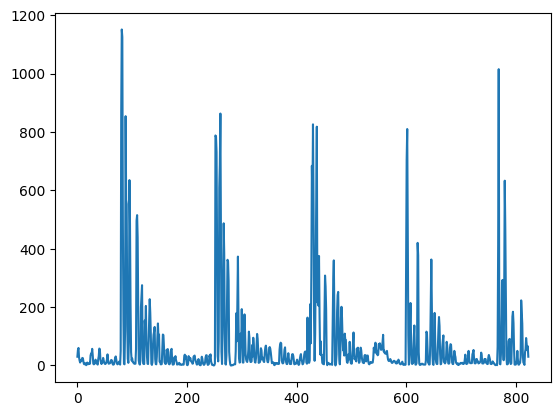

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv("../data/methane_concentration/FirstVisit/merged_10.csv")

# Extract the second column by index (1 is the second column) and convert it to a list
myts = df.iloc[:, 1].tolist()

# Print or use the list
print(myts)

plt.plot(myts)


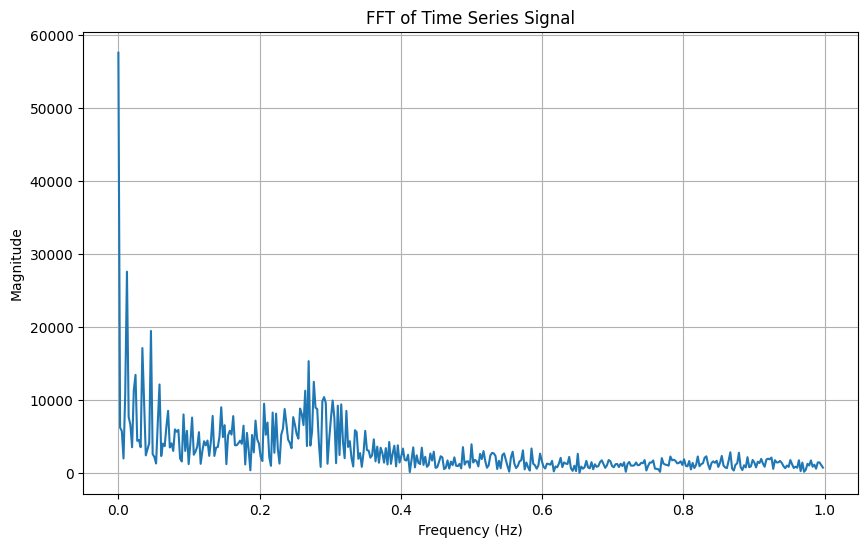

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example time series data (replace this with your actual data)
# Assuming signal is sampled at 2 Hz
signal = np.array(myts)  # Replace with your actual time series data
sampling_freq = 2  # in Hz
n = len(signal)

# Perform FFT
fft_values = np.fft.fft(signal)
fft_magnitude = np.abs(fft_values)

# Generate frequency axis
freqs = np.fft.fftfreq(n, d=1/sampling_freq)

# Only keep positive frequencies
positive_freqs = freqs[:n//2]
positive_magnitude = fft_magnitude[:n//2]

# Plot FFT
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_magnitude)
plt.title('FFT of Time Series Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [14]:
def generate_ts(len):
    tf = 80 * np.pi
    t = np.linspace(0., tf, len)
    y = np.sin(t) + 0.8 * np.cos(.5 * t) + np.random.normal(0., 0.3, len) + 2.5
    return y.tolist()

def sliding_window(ts, features, target_len = 1):
    # target_len : how many steps (samples) to predict
    X = []
    Y = []

    for i in range(features + target_len, len(ts) + 1):
        X.append(ts[i - (features + target_len):i - target_len])
        Y.append(ts[i - target_len:i])

    return X, Y

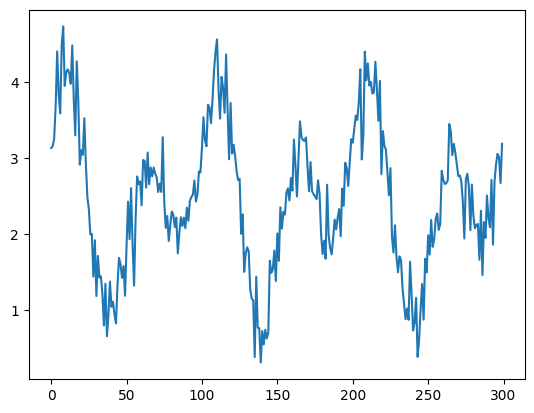

In [5]:
ts = generate_ts(2000)
plt.plot(ts[:300])
plt.show()

# LSTM Encoder 

Conventions for Encoder module

- `x` $\in \mathbb{R}^{L \times N \times H_{in}}$ (by default `batch_first=False`)
- `out` $\in \mathbb{R}^{L \times N \times H_{out}}$
- `h` is a tuple: `(hout, c)`
- `hout` $\in \mathbb{R}^{K \times N \times H_{out}}$

where

- $N$: Batch size
- $L$: Sequence Length
- $K$: `num_layers`
- $H_{in}$: `input_size`
- $H_{out}$: `hidden_size`

In [16]:
class Encoder(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers = 1):
        super(Encoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers)

    def forward(self, x):
        flat = x.view(x.shape[0], x.shape[1], self.input_size)
        out, h = self.lstm(flat)
        return out, h

# LSTM Decoder

Conventions for Decoder module

- `x` $\in \mathbb{R}^{N \times H_{in}}$ 
- `x.unsqueeze(0)` $\in \mathbb{R}^{1 \times N \times H_{in}}$ 
- `out` $\in \mathbb{R}^{1 \times N \times H_{out}}$ 
- `out.squeeze(0)` $\in \mathbb{R}^{N \times H_{out}}$ 
- `y` $\in \mathbb{R}^{N \times P}$ 
- `h` is a tuple: `(hout, c)`
- `hout` and `c` $\in \mathbb{R}^{K \times N \times H_{out}}$

where:

- $N$: Batch size
- $P$: `output_size`
- $K$: `num_layers`
- $H_{in}$: `input_size`
- $H_{out}$: `hidden_size`

In [17]:
class Decoder(nn.Module):

    def __init__(self, input_size, hidden_size, output_size = 1, num_layers = 1):
        super(Decoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, h):
        out, h = self.lstm(x.unsqueeze(0), h)
        y = self.linear(out.squeeze(0))
        return y, h

# Encoder-Decoder architecture

Conventions for Encoder-Decoder module

- `train` $\in \mathbb{R}^{L \times N \times H_{in}}$ (by default `batch_first=False`)
- `dec_in` $\in \mathbb{R}^{N \times H_{in}}$, picks the last sequence in `train`
- `enc_h` $=$ `dec_h` is a tuple: `(f, c)` 
- `f` and `c` $\in \mathbb{R}^{K \times N \times H_{out}}$

where

- $N$: Batch size
- $L$: Sequence Length
- $K$: `num_layers`
- $P$: `output_size`
- $H_{in}$: `input_size`
- $H_{out}$: `hidden_size`

In [18]:
class EncoderDecoder(nn.Module):

    def __init__(self, hidden_size, input_size = 1, output_size = 1):
        super(EncoderDecoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.encoder = Encoder(input_size = input_size, hidden_size = hidden_size)
        self.decoder = Decoder(input_size = input_size, hidden_size = hidden_size, output_size = output_size)

    def train_model(
            self, train, target, epochs, target_len, method = 'recursive',
            tfr = 0.5, lr = 0.01, dynamic_tf = False
    ):
        losses = np.full(epochs, np.nan)
        optimizer = optim.Adam(self.parameters(), lr = lr)
        criterion = nn.MSELoss()

        for e in range(epochs):
            predicted = torch.zeros(target_len, train.shape[1], train.shape[2])
            optimizer.zero_grad()
            _, enc_h = self.encoder(train)

            dec_in = train[-1, :, :]
            dec_h = enc_h

            if method == 'recursive':
                for t in range(target_len):
                    dec_out, dec_h = self.decoder(dec_in, dec_h)
                    predicted[t] = dec_out
                    dec_in = dec_out

            if method == 'teacher_forcing':
                # use teacher forcing
                if random.random() < tfr:
                    for t in range(target_len):
                        dec_out, dec_h = self.decoder(dec_in, dec_h)
                        predicted[t] = dec_out
                        dec_in = target[t, :, :]
                # predict recursively
                else:
                    for t in range(target_len):
                        dec_out, dec_h = self.decoder(dec_in, dec_h)
                        predicted[t] = dec_out
                        dec_in = dec_out

            if method == 'mixed_teacher_forcing':
                # predict using mixed teacher forcing
                for t in range(target_len):
                    dec_out, dec_h = self.decoder(dec_in, dec_h)
                    predicted[t] = dec_out
                    # predict with teacher forcing
                    if random.random() < tfr:
                        dec_in = target[t, :, :]
                    # predict recursively
                    else:
                        dec_in = dec_out

            loss = criterion(predicted, target)
            loss.backward()
            optimizer.step()

            losses[e] = loss.item()

            if e % 10 == 0:
                print(f'Epoch {e}/{epochs}: {round(loss.item(), 4)}')

            # dynamic teacher forcing
            if dynamic_tf and tfr > 0:
                tfr = tfr - 0.02

        return losses

    def predict(self, x, target_len):
        y = torch.zeros(target_len, x.shape[1], x.shape[2])

        _, enc_h = self.encoder(x)
        dec_in = x[-1, :, :]
        dec_h = enc_h

        for t in range(target_len):
            dec_out, dec_h = self.decoder(dec_in, dec_h)
            y[t] = dec_out
            dec_in = dec_out

        return y

# Set random seed for reproducibility

In [11]:
seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Define parameters

In [12]:
ts_len = 2000 # synthetic time series length
hidden_size = 80 # lstm hidden size
test_ds_len = 500 # test dataset size
epochs = 1000 # training epochs
ts_history_len = 200 # sliding window size
ts_target_len = 60 # prediction length

# Create dataset for training and test

In [21]:
#ts = generate_ts(ts_len)
X, Y = sliding_window(myts, ts_history_len, ts_target_len)
ds_len = len(X)

def to_tensor(data):
    
    return torch.tensor(data = data)\
        .unsqueeze(2)\
        .transpose(0, 1).float()
    
    '''
    return torch.tensor(data = data)\
        .transpose(0, 1).float()
    '''

x_train = to_tensor(X[:ds_len - test_ds_len])
y_train = to_tensor(Y[:ds_len - test_ds_len])
x_test = to_tensor(X[ds_len - test_ds_len:])
y_test = to_tensor(Y[ds_len - test_ds_len:])

In [50]:
print(f"ts len: {len(ts)}, X len: {len(X)}, X[0] len: {len(X[0])}")

NameError: name 'ts' is not defined

# Shape of train sets

In [19]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: torch.Size([200, 3137, 1])
y_train shape: torch.Size([60, 3137, 1])


# Create model

In [22]:
model = EncoderDecoder(hidden_size = hidden_size, input_size=1)

# Train the model

In [23]:
model.train()
model.train_model(x_train, y_train, epochs, ts_target_len,
                  method = 'mixed_teacher_forcing',
                  tfr = .05, lr = .005)

Epoch 0/1000: 31180.9746
Epoch 10/1000: 30405.0742
Epoch 20/1000: 29681.3789
Epoch 30/1000: 29115.9355
Epoch 40/1000: 28615.0176
Epoch 50/1000: 28167.9141
Epoch 60/1000: 27768.1113
Epoch 70/1000: 27423.5254
Epoch 80/1000: 27123.8945
Epoch 90/1000: 26864.1465
Epoch 100/1000: 26639.7129
Epoch 110/1000: 26446.4941
Epoch 120/1000: 26280.6055
Epoch 130/1000: 26138.6641
Epoch 140/1000: 26017.8457
Epoch 150/1000: 25915.6895
Epoch 160/1000: 25829.1523
Epoch 170/1000: 25753.5723
Epoch 180/1000: 25691.1602
Epoch 190/1000: 25638.2461
Epoch 200/1000: 25590.4121
Epoch 210/1000: 25547.6094
Epoch 220/1000: 25502.7793
Epoch 230/1000: 25472.4219
Epoch 240/1000: 25432.5977
Epoch 250/1000: 25403.1992
Epoch 260/1000: 25401.166
Epoch 270/1000: 25330.2383
Epoch 280/1000: 25313.209
Epoch 290/1000: 25248.8438
Epoch 300/1000: 24981.6992
Epoch 310/1000: 25117.6523
Epoch 320/1000: 25253.5879
Epoch 330/1000: 25011.9746
Epoch 340/1000: 24917.5898
Epoch 350/1000: 25390.0117
Epoch 360/1000: 25340.8418
Epoch 370/1000

array([31180.97460938, 31161.84765625, 31136.72460938, 31113.94335938,
       31049.50585938, 30942.91210938, 30801.6640625 , 30691.71875   ,
       30590.671875  , 30491.48242188, 30405.07421875, 30338.71289062,
       30251.05859375, 30155.9375    , 30085.93359375, 30013.02539062,
       29938.38867188, 29889.        , 29806.99023438, 29747.20898438,
       29681.37890625, 29616.25390625, 29556.72460938, 29501.58007812,
       29444.29296875, 29391.53125   , 29333.53125   , 29276.90625   ,
       29225.33398438, 29167.10546875, 29115.93554688, 29063.57617188,
       29010.26953125, 28958.1328125 , 28907.34570312, 28857.20703125,
       28807.6796875 , 28758.31445312, 28709.953125  , 28662.50585938,
       28615.01757812, 28568.26953125, 28522.24609375, 28476.53515625,
       28431.29492188, 28386.91015625, 28342.734375  , 28298.90039062,
       28255.06054688, 28211.60351562, 28167.9140625 , 28124.98046875,
       28083.109375  , 28042.05859375, 28001.67773438, 27961.8515625 ,
      

# Evaluate on test set

In [24]:
model.eval()
predicted = model.predict(x_test, ts_target_len)

In [25]:
predicted.shape

torch.Size([60, 500, 1])

# Plot results

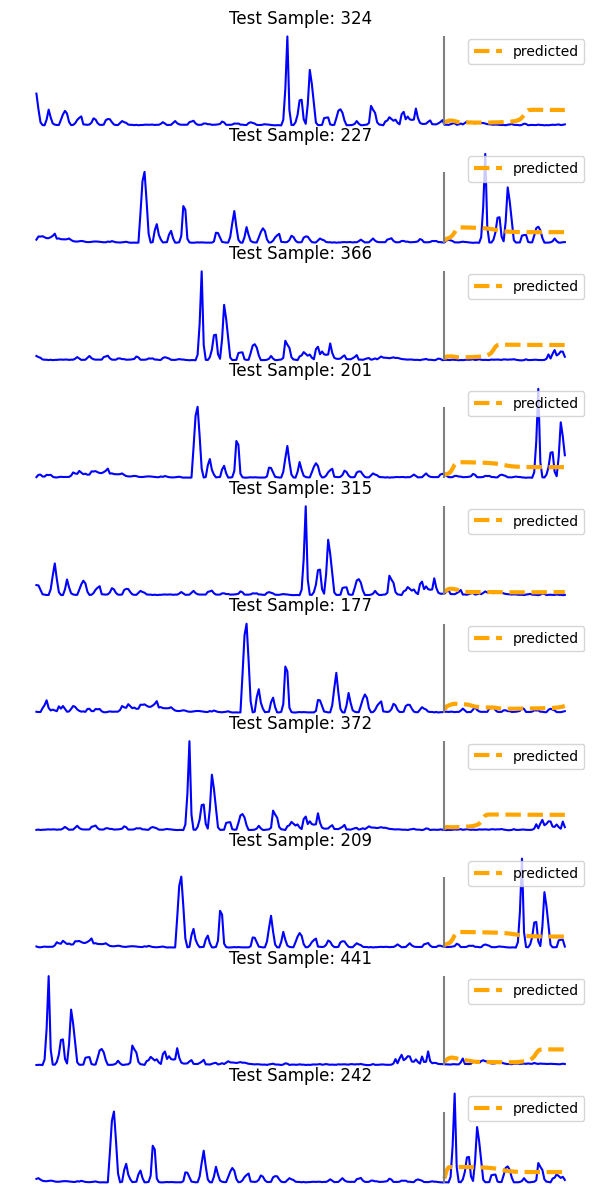

In [26]:
fig, ax = plt.subplots(nrows = 10, ncols = 1)
fig.set_size_inches(7.5, 15)
for col in ax:
    r = random.randint(0, test_ds_len)

    # Get one of the test sequences
    in_seq = x_test[:, r, 0].view(-1).tolist()

    # True multi-step values
    target_seq = y_test[:, r, 0].view(-1).tolist()
    pred_seq = predicted[:, r, :].view(-1).tolist()
    x_axis = range(len(in_seq) + len(target_seq))
    col.set_title(f'Test Sample: {r}')
    col.axis('off')
    col.plot(x_axis[:], in_seq + target_seq, color = 'blue')
    col.plot(x_axis[len(in_seq):],
             pred_seq,
             label = 'predicted',
             color = 'orange',
             linestyle = '--',
             linewidth = 3)
    col.vlines(len(in_seq), 0, np.max(in_seq), color = 'grey')
    col.legend(loc = "upper right")

plt.show()

In [22]:
print(test_ds_len, x_test.shape)

200 torch.Size([240, 200, 1])


In [25]:
a = x_test[:, 2, :]
b = a.view(-1)
print(a.shape)
print(b.shape)
print(len(in_seq))

torch.Size([240, 1])
torch.Size([240])
240


In [27]:
y_test.shape

torch.Size([60, 200, 1])

In [19]:
import os
os.getcwd()

'/home/julian/Documents/repos/Time-Series-Library-Fork/notebooks'

In [18]:
import sys
sys.path.append("../classes")

from DataManager import DataManager

ModuleNotFoundError: No module named 'DataManager'